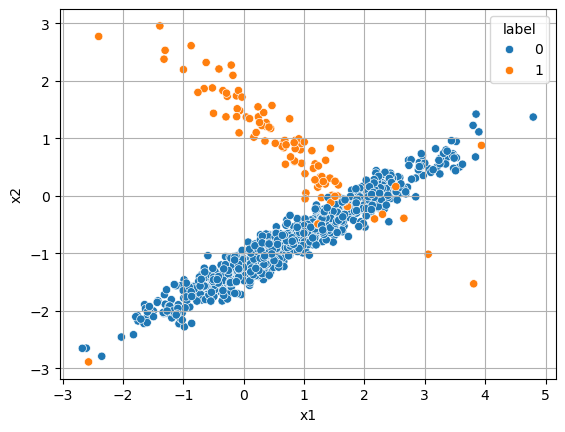

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Sampling.csv")
sns.scatterplot(data=df, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

In [7]:
df["label"].value_counts()

# 파란색데이터가 895개, 빨간색데이터가 105개.  불균형

label
0    895
1    105
Name: count, dtype: int64

# 데이터를 균형있게 만드는 법

# 1. 895개를 105개로 줄이는 경우 - 언더샘플링

## <랜덤언더샘플링>

In [10]:
# 랜덤언더샘플링
from imblearn.under_sampling import RandomUnderSampler

# 문제집과 정답지
X = df.drop("label", axis = 1)
Y = df["label"]

model = RandomUnderSampler()
X2, Y2 = model.fit_resample(X, Y)       # X2,Y2는 균형적인 샘플

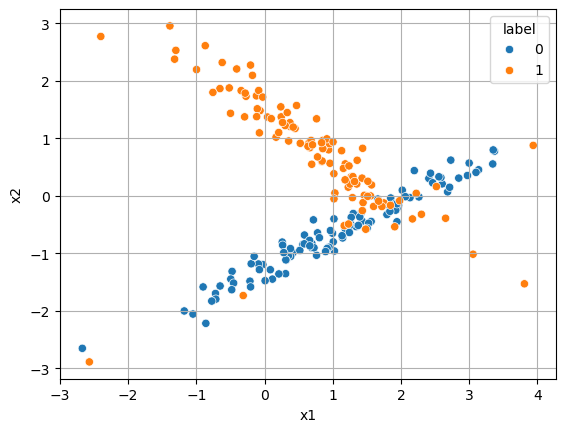

In [12]:
df2 = pd.concat([X2, Y2], axis = 1)
sns.scatterplot(data=df2, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

In [13]:
df2["label"].value_counts()

label
0    105
1    105
Name: count, dtype: int64

## <토맥으로 데이터지우기>
- 경계에 있는 애들을 짝을 이뤄서 많은쪽데이터에 해당하는 부분을 지운다   
- 랜덤보다는 더 좋음

In [16]:
from imblearn.under_sampling import TomekLinks

model = TomekLinks()
X2, Y2 = model.fit_resample(X, Y)

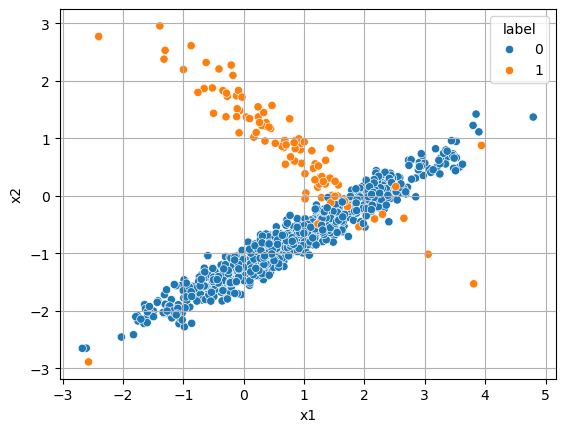

In [17]:
df2 = pd.concat([X2, Y2], axis = 1)
sns.scatterplot(data=df2, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

# 경계쪽부분만 없앰

# 2. 105개를 895개로 늘리는 경우 - 오버샘플링

## <랜덤오버샘플링> (안쓰는게좋음)

In [20]:
from imblearn.over_sampling import RandomOverSampler    # 랜덤으로 몇개를 복사

model = RandomOverSampler()
X2, Y2 = model.fit_resample(X, Y)         # 훈련세트에 있는 데이터가 시험세트에 들어갈 위험

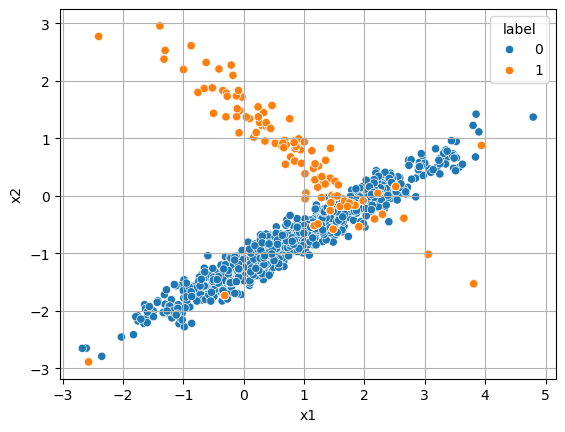

In [21]:
df2 = pd.concat([X2, Y2], axis = 1)
sns.scatterplot(data=df2, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

# 차이가 안느껴짐... 여전히파란색이많아보임

In [22]:
df2["label"].value_counts()

# 개수는 늘어난 걸 확인할수있음
# = 같은자리에 겹쳐서 안늘어난것처럼 보이는 것

label
0    895
1    895
Name: count, dtype: int64

똑같은데이터가 test set에도, train set에도 존재 -> 과대적합 발생   
=> 특별한상황아니면 쓰지말기

## <스모트>
- k최근접 이웃 방법을 사용해 데이터를 증강하는 방법
- 사실상 조작이니까 늘려도 될 것 같은 데이터에만 사용

In [40]:
# SMOTE : 이 세상에 없는 걸 만들어낸 것.
from imblearn.over_sampling import SMOTE

model = SMOTE(k_neighbors=5)     # 이웃 숫자 정해줘야함
X2, Y2 = model.fit_resample(X, Y)

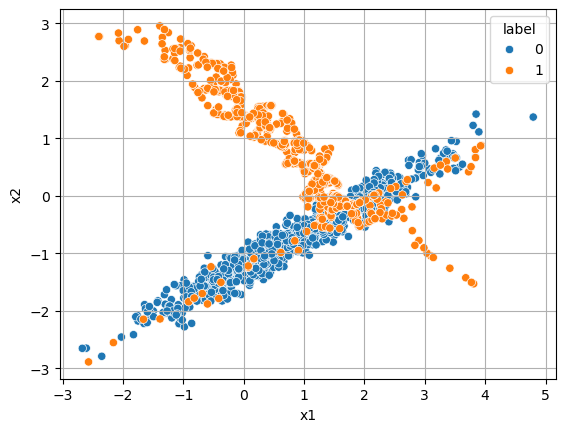

In [41]:
df2 = pd.concat([X2, Y2], axis = 1)
sns.scatterplot(data=df2, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

In [37]:
df2["label"].value_counts()

label
0    895
1    895
Name: count, dtype: int64

## <ADASYN..>

### SMOTE와 ADASYN 차이   

SMOTE의 경우는 합성 데이터를 만들 때마다 일정한 개수를 만들게 되지만,    
ADASYN의 경우는 i번 째의 밀도함수 값을 구해서 G를 곱하여 그 개수만큼 만들기 때문에         
각 샘플마다 얼마나 주변에 majority한 샘플이 있는가에 따라 만들어지는 개수가 달라지게 된다

In [42]:
from imblearn.over_sampling import ADASYN

model = ADASYN(n_neighbors=5)
X2, Y2 = model.fit_resample(X, Y)

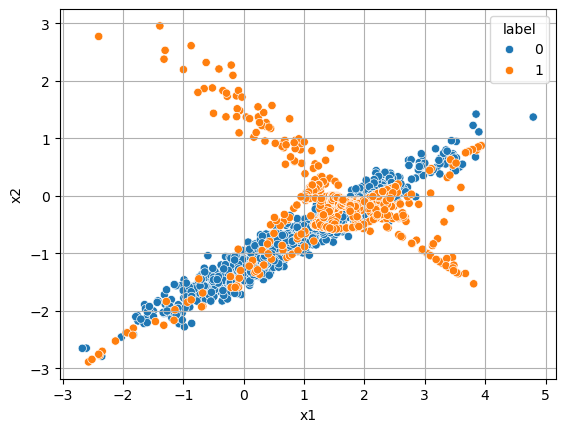

In [43]:
df2 = pd.concat([X2, Y2], axis = 1)
sns.scatterplot(data=df2, x="x1", y="x2", hue="label")
plt.grid()
plt.show()

# 군집화 - DBSCAN

- 밀도기반.
- 주변에 어떤것들이 있는지 보면서 걔네들을 흡수

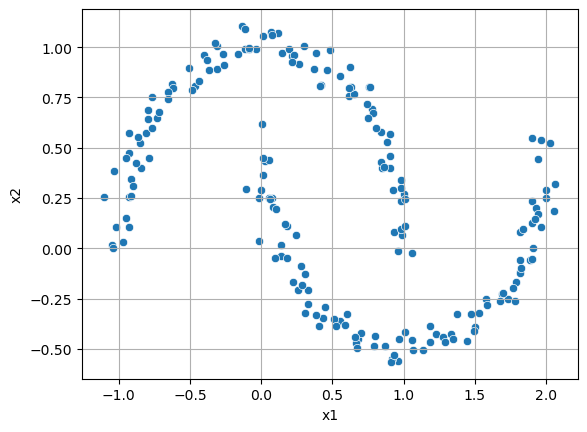

In [46]:
df = pd.read_csv("Data/DBSCAN.csv")
del df["target"]

sns.scatterplot(data=df, x="x1", y="x2")
plt.grid()
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()       # 스케일링

X = df.values
X_scaled = ss.fit_transform(X)

In [96]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.34, min_samples=5)  
# eps: 반경
# min_samples : 핵심 포인트가 되기 위한 최소 이웃 수

In [97]:
clusters = model.fit_predict(X_scaled)
clusters

# -1 : 어느반경에도 못들어간것

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [98]:
df["target"] = clusters
df.head()

,x1,x2,target
0,-1.020690,0.105518,0
1,0.905826,0.457858,0
2,0.618422,0.757086,0
3,1.227707,-0.425185,1
4,0.329356,-0.206946,1


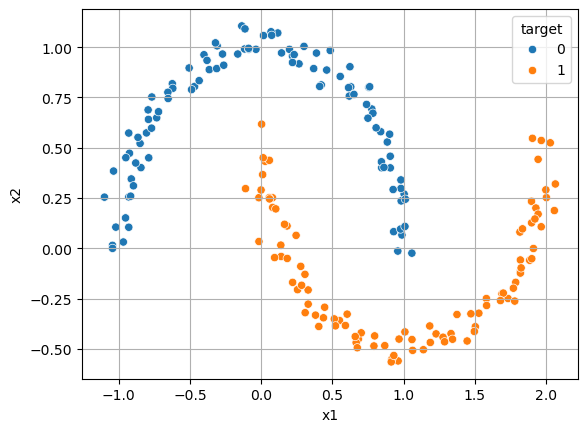

In [99]:
sns.scatterplot(data=df, x="x1", y="x2", hue="target")
plt.grid()
plt.show()

# 계층적군집화

- K값을 지정할 필요X

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = sns.load_dataset("iris")
del iris["species"]

X = iris.values 
X_scaled = ss.fit_transform(X)

# linkage로 거리계산
# method에 들어갈 수 있는 옵션  -  single(가장 가까운 데이터 기준), complete(가장 먼 데이터 기준), average, ward(분산의 증가량 최소 기준)
linked = linkage(X_scaled, method="ward")
linked

# 군집1, 군집2, 거리, 병합된 군집의 크기

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.72216546e

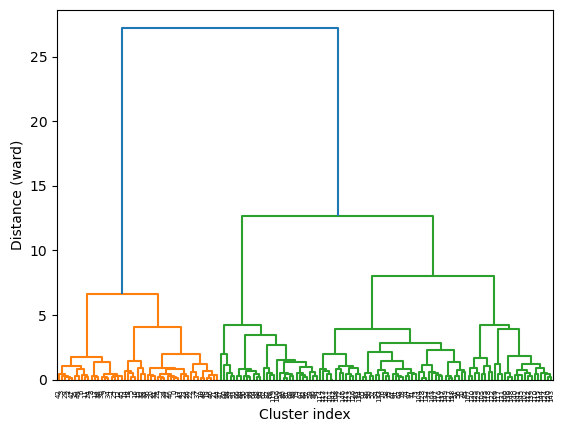

In [108]:
dendrogram(linked)
plt.xlabel("Cluster index")
plt.ylabel("Distance (ward)")
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering

# 거리 임계값
model = AgglomerativeClustering(n_clusters=None,       # 군집 몇갠지 모르므로 None으로 
                                distance_threshold=10, linkage="ward") 

cluster = model.fit_predict(X_scaled)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
iris["target"] = cluster
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


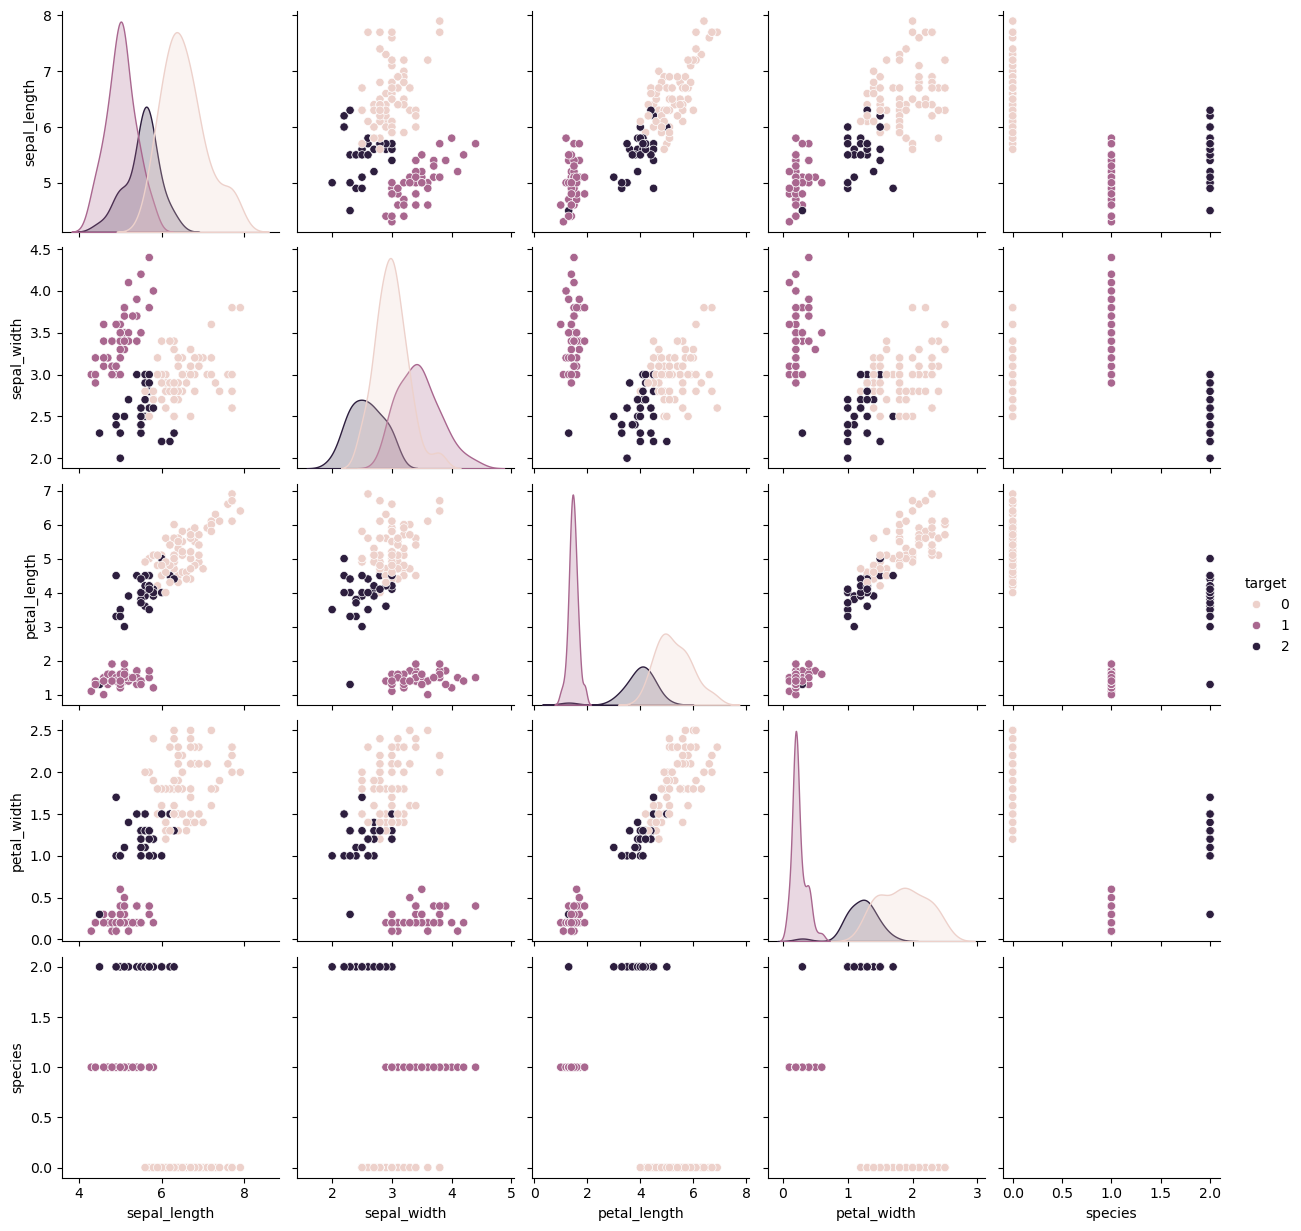

In [115]:
sns.pairplot(iris, hue="target")

# 주성분분석
- 차원축소기법. 성분을 찾고 성분을 사영시켜서 y값으로 데이터를 찾는 걸 반복
- 특성끼리 상관관계가 높을 때(다중공산성문제 있을때)
- 과대적합을 막는 효과
- 학습속도 향상
- 군집화가 잘 되었는지 확인 용도

In [120]:
import numpy as np
fruits = np.load("Data/fruits_300.npy").reshape(300, 10000)

df = pd.DataFrame(fruits)      # 가로한줄이 이미지 하나
df["target"] = [0]*100 + [1]*100 + [2]*100
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


## - 랜덤포레스트 활용해서 분류 모델 만들고 성능 확인

In [128]:
# 문제집,정답지
from sklearn.ensemble import RandomForestClassifier

X = df.drop("target", axis = 1).values
Y = df['target'].values

model = RandomForestClassifier(oob_score=True)        # oob score로 평가 가능
model.fit(X, Y)
model.oob_score_

# 99.7%

0.9966666666666667

In [141]:
from sklearn.decomposition import PCA

# 10000개의 특성을 대표하는 주성분 50개를 찾겠다  =>  원본만큼의 성능은 못내나, 속도 아주빨라짐
pca = PCA(n_components=50)

X_scaled = X / 255       # 0~1로 됨.  

pca_x = pca.fit_transform(X_scaled)
pca_x.shape

# 50개로 줄었다

(300, 50)

In [142]:
# 다시 모델 만들어서 랜덤포레스트
model = RandomForestClassifier(oob_score=True)
model.fit(pca_x, Y)
model.oob_score_

0.9966666666666667

## 주성분 분석 결과가  원본에 비해 설명력을 얼마나 잃었는지 확인

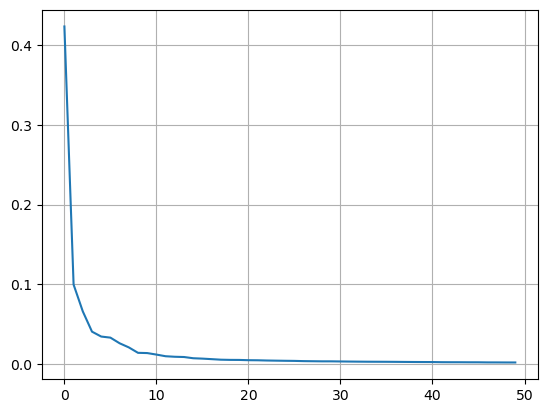

In [143]:
# 총 50개의 주성분
# 1등 주성분부터 ~ 50 주성분까지 데이터의 설명력

A = pca.explained_variance_ratio_
plt.plot(A)
plt.grid()
plt.show()

# 주성분을 10개정도만 찾아도 원본데이터의 대부분을 표시할수있다 

In [150]:
# 만약 주성분을 50개말고 2개만 찾는다면....

pca = PCA(n_components=2)

X_scaled = X / 255       # 0~1로 됨.  

pca_x = pca.fit_transform(X_scaled)
pca_x.shape

(300, 2)

In [151]:
model = RandomForestClassifier(oob_score=True)
model.fit(pca_x, Y)
model.oob_score_
# 성능좋음

0.9966666666666667

<Axes: xlabel='x1', ylabel='x2'>

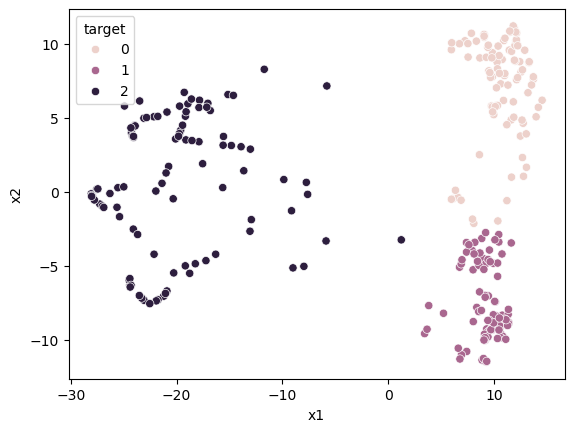

In [152]:
df2 = pd.DataFrame(pca_x, columns = ["x1", "x2"])
df2["target"] = Y

sns.scatterplot(data=df2, x="x1", y="x2", hue="target")

# 군집이 상당히 잘 잡혀있음  ->  주성분 2개로 나뉜 군집도 의미없게나뉜건 아님

# SVM

<Axes: xlabel='x1', ylabel='x2'>

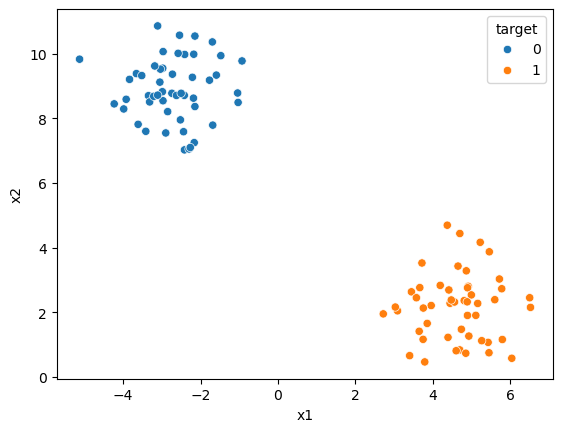

In [154]:
# 머신러닝 : 서포트 벡터 머신 (분류, 회귀)  /  이진분류
df = pd.read_csv("Data/SVM data.csv")

sns.scatterplot(data=df, x="x1", y="x2", hue="target")

선위에있으면 0, 선아래있으면 1 이런식으로 구분하도록 가운데에 선을 그음

In [164]:
# 문제집정답지
X = df.drop("target", axis = 1)
Y = df["target"]

# 데이터분할
train_x, test_x, train_y, test_y = train_test_split(X,Y)

# 표준화
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.fit_transform(test_x)

In [165]:
from sklearn.svm import SVC

# C값을 작게 하면 허용을 크게한다는 뜻 = 과대적합을 막는다 (C값이 크면 허용을작게 = 과대적합이 날수도)
# 0.01, 0.1, 1, 10, 100
movel = SVC(C = 1, probability = True)

model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

1.0

분류는 마진 안에 데이터가 안들아가게 하는 반면,   
회귀는 마진 안에 데이터가 최대한 많이 들어가게 해서 회귀식 예측한다